In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
data = pd.read_csv('../mlcourse.ai/data/bikes_rent.csv')

In [3]:
 data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [4]:
data.shape

(731, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

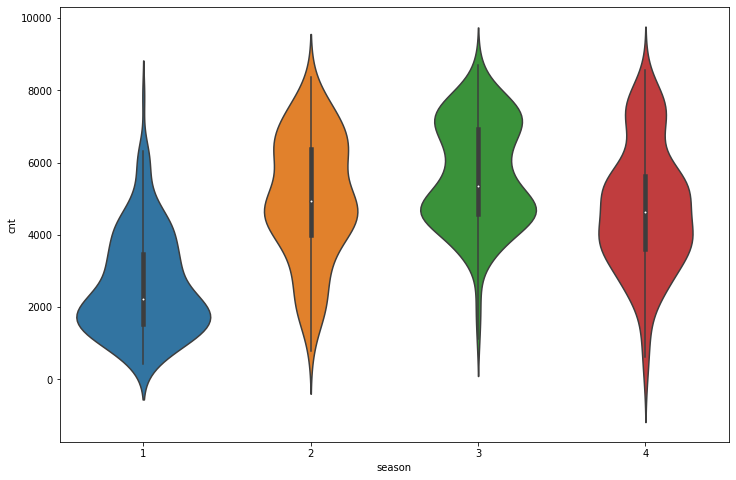

In [9]:
sns.violinplot(data.season, data.cnt)

<AxesSubplot:>

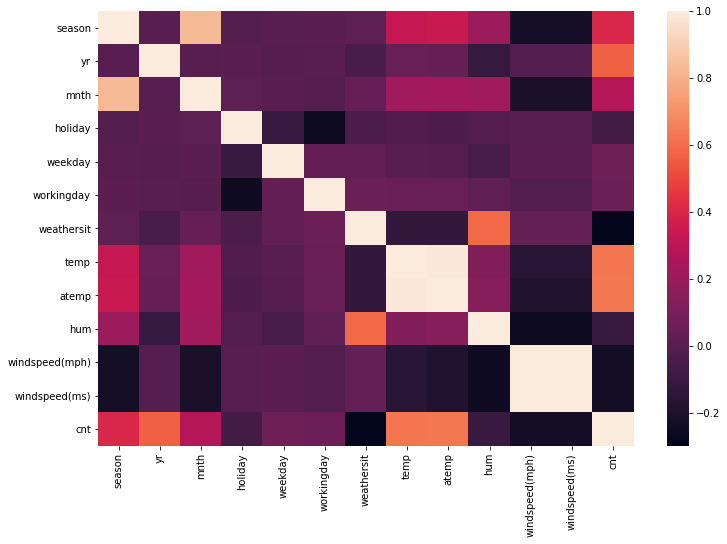

In [10]:
sns.heatmap(data.corr())

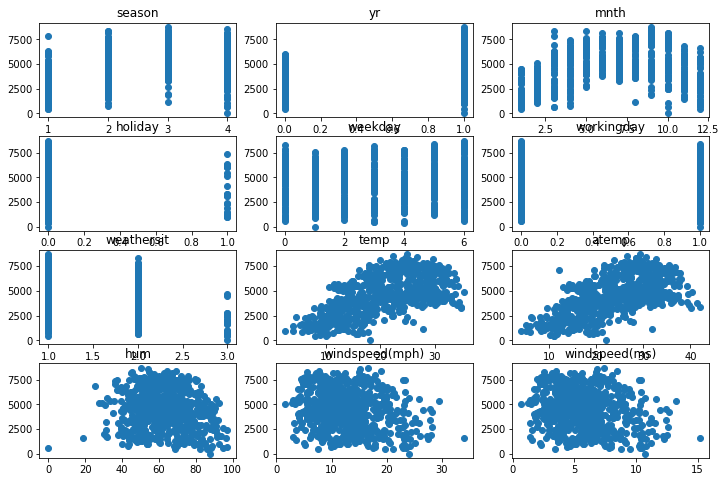

In [12]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i+1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

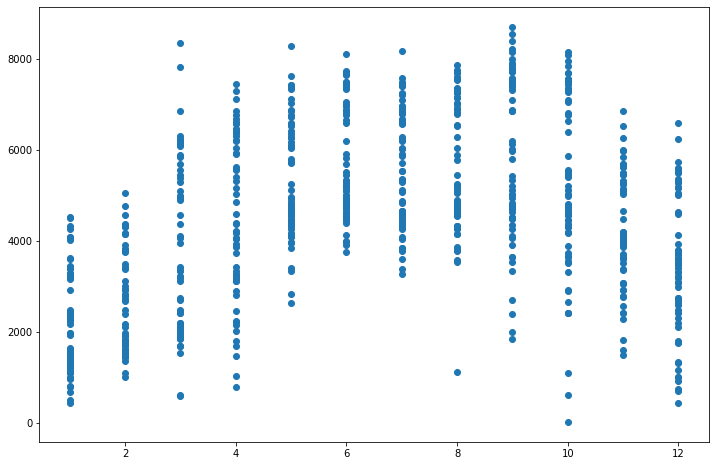

In [14]:
plt.scatter(data.mnth, data.cnt)

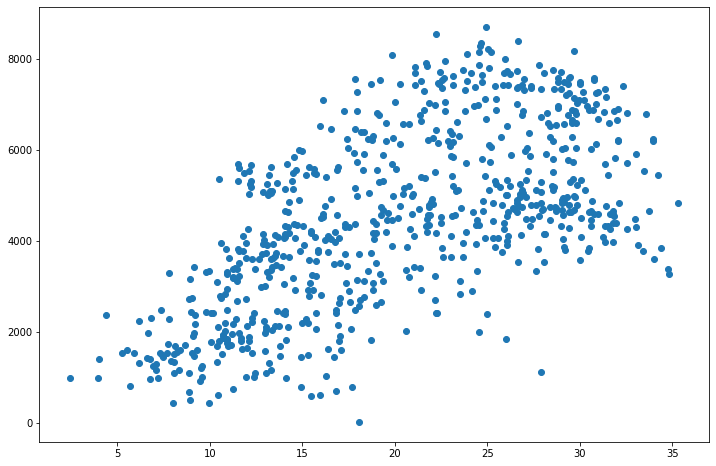

In [17]:
plt.scatter(data.temp, data.cnt)

In [68]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [69]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)

lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [70]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [71]:
train_part_size = int(.7 * X.shape[0])
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_valid_scaled = scaler.transform(X_valid)

In [73]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaler)))

1121.7959174734228

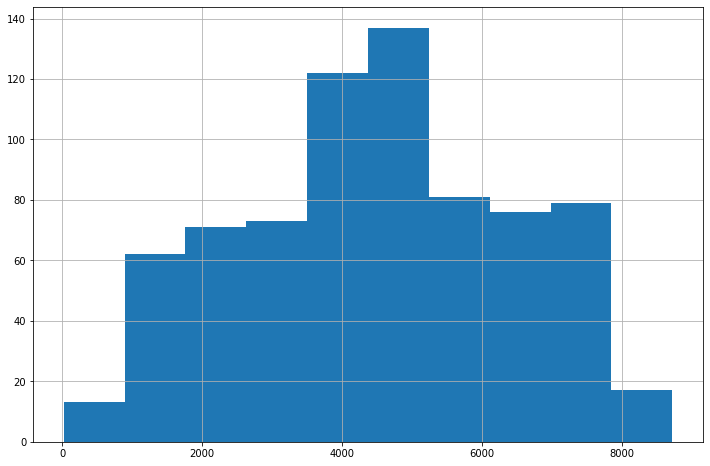

In [75]:
data['cnt'].hist();

In [76]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.051193e+12
yr,9.540706e+02
atemp,8.911709e+02
season,4.048576e+02
weekday,1.037114e+02
temp,6.248634e+01
mnth,3.081084e+01
workingday,1.470224e+01
holiday,-6.757366e+01
hum,-1.589777e+02


In [123]:
def train_validata_report(model, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names, forest=False):
    
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))
    print('Model coefficents:')
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coef'
    print(pd.DataFrame(coef, feature_names, columns=[coef_name]).sort_values(by=coef_name, ascending=False))

In [124]:
train_validata_report(lasso, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                         feature_names=data.columns[:-1])

MSE=1120.721409
Model coefficents:
                      Coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [125]:
train_validata_report(lasso_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                         feature_names=data.columns[:-1])

MSE=1120.743661
Model coefficents:
                      Coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [126]:
train_validata_report(ridge, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                         feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficents:
                      Coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [127]:
train_validata_report(ridge_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                         feature_names=data.columns[:-1])

MSE=1118.903543
Model coefficents:
                      Coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [132]:
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [133]:
train_validata_report(forest, X_train, y_train,
                         X_valid, y_valid,
                         feature_names=data.columns[:-1], forest=True)

MSE=1046.960772
Model coefficents:
                Importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615
